In [2]:
# imports
from isweep import *
import warnings
warnings.filterwarnings("ignore")

In [6]:
def isweep_scored_variants(table,
                           idx=(0,1,5),
                           xlabel='Position',
                           ylabel='Allele Frequency',
                           zlabel='Score',
                           cmap='cividis',
                           s=5
                          ):
    columns=list(table.columns)
    pos=columns[idx[0]]
    aaf=columns[idx[1]]
    sco=columns[idx[2]]
    x=table[pos]
    y=table[aaf]
    z=table[sco]
    plt.scatter(x,y,c=z,s=s,cmap=cmap)
    plt.colorbar(label=zlabel)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.ylim(-0.05,1.05)
    return None

def isweep_window_scan(table,
                       column='AAFCV',
                       columnname='Coefficient of Variation'
                      ):
    x=table['POSWIN']
    y=table[column]
    plt.plot(x,y)
    plt.scatter(x,y,s=10)
    plt.ylabel(columnname)
    plt.xlabel('Position')
    return None

def isweep_windows(table,idx=(0,1),by=20_000,size=100_000):
    headernames=list(table.columns)
    pos=headernames[idx[0]]
    aaf=headernames[idx[1]]
    winmin=table[pos].min()
    winmax=table[pos].max()-size
    winrange=np.arange(winmin,winmax,by)
    windowed=dict()
    ctr=0
    for w in winrange:
        winleft=w
        winright=w+size
        winmid=(winleft+winright)/2
        subtable=table[(table[pos]>=winleft)&(table[pos]<winright)]
        if subtable.shape[0] >=1:
            stddev=subtable[aaf].std()
            avg=subtable[aaf].mean()
            perc50=np.quantile(subtable[aaf],0.5)
            perc10=np.quantile(subtable[aaf],0.1)
            perc5=np.quantile(subtable[aaf],0.05)
            perc2=np.quantile(subtable[aaf],0.02)
            perc1=np.quantile(subtable[aaf],0.01)
            cv=stddev/avg
            windowed[ctr]=(winmid,
                           avg,
                           stddev,
                           cv,
                           perc50,
                           perc10,
                           perc5,
                           perc2,
                           perc1
                          )
            ctr += 1
    windowed=pd.DataFrame(windowed)
    windowed=windowed.T
    windowed.columns=['POSWIN',
                      'AAFAVG',
                      'AAFSTDDEV',
                      'AAFCV',
                      'AAFPERC50',
                      'AAFPERC10',
                      'AAFPERC5',
                      'AAFPERC2',
                      'AAFPERC1'
                     ]
    return windowed

In [35]:
# input names
snpfilein='isweep.ranks.tsv.gz' # file with snps tabulated
locusname='Toll-like receptors' # name of region of interest
nefile='ibdne.ne' # Ne file in IBDNe style
window_size=100_000 # statistics over 100 kb
window_slide=20_000 # slide by 20 kb
idx=(0,1,5) # column indices: position, frequency, score
cmap='cividis' # https://matplotlib.org/stable/tutorials/colors/colormaps.html
dot_size=5 # scatter point size

In [36]:
# read in table
# compute over summary stats over windows
# sort window table
tab=pd.read_csv(snpfilein,sep='\t')
wintab=isweep_windows(tab,idx[:2],window_slide,window_size)
tabsort=wintab.sort_values(by='AAFCV')
tabsort.head(20)

,POSWIN,AAFAVG,AAFSTDDEV,AAFCV,AAFPERC50,AAFPERC10,AAFPERC5,AAFPERC2,AAFPERC1
341,42130303.0,0.782545,0.071219,0.091010,0.780047,0.733700,0.731422,0.726630,0.711453
337,42050303.0,0.765304,0.073547,0.096102,0.766300,0.742341,0.742341,0.731642,0.396009
338,42070303.0,0.768331,0.080447,0.104703,0.780047,0.742341,0.739592,0.718068,0.255224
340,42110303.0,0.775118,0.086466,0.111552,0.780047,0.735271,0.733700,0.731681,0.382985
339,42090303.0,0.768641,0.088891,0.115647,0.780047,0.738452,0.733700,0.731493,0.196614
335,42010303.0,0.761901,0.093467,0.122675,0.765907,0.745090,0.742341,0.667871,0.124097
336,42030303.0,0.758713,0.098412,0.129709,0.765907,0.742341,0.742341,0.366881,0.123778
191,39130303.0,0.658630,0.092621,0.140627,0.608798,0.590731,0.549489,0.549489,0.549489
193,39170303.0,0.693007,0.098019,0.141440,0.703849,0.594187,0.593087,0.591123,0.590731
334,41990303.0,0.763346,0.109795,0.143834,0.765907,0.747054,0.742341,0.229772,0.123951


### Isweep inference assisted by plots

The first plot shows the coefficient of variation for the variant allele frequencies in a sliding window. The region(s) with the lowest coefficient of variation are indicative of selection. The allele frequency is for the putative derived allele, which is the allele more frequent in the inferred group of excess ibd.

The second plot shows the variant allele frequencies (with isweep scores) for the region of interest. If this region is too large, you can subset to smaller area in the third plot by setting the matplotlib.pyplot xlim parameters.

For interpretation of these plots, visit the isweep paper (hyperlink) or the tutorial at the end of this notebook. You will base your final analyses on these interpretations. Note that not all regions of low coefficient of variation are indicative of a strong and recent selection sweep. Some of these selection signals may indicate a different mechanism of selection.

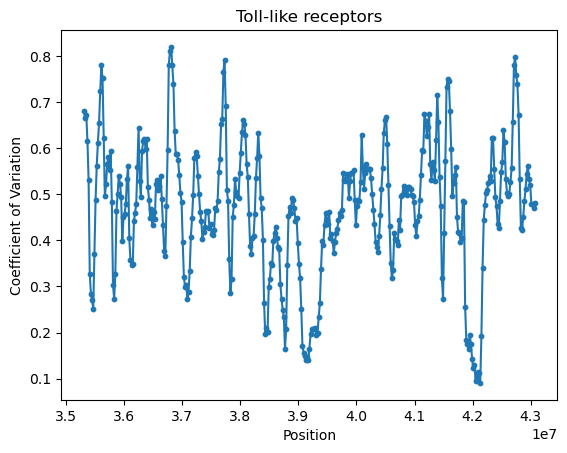

In [37]:
# make line plot
# position by coefficient of variation
isweep_window_scan(wintab)
plt.title(locusname)
plt.savefig(locusname+'.isweep.window.scan.png',dpi=300)

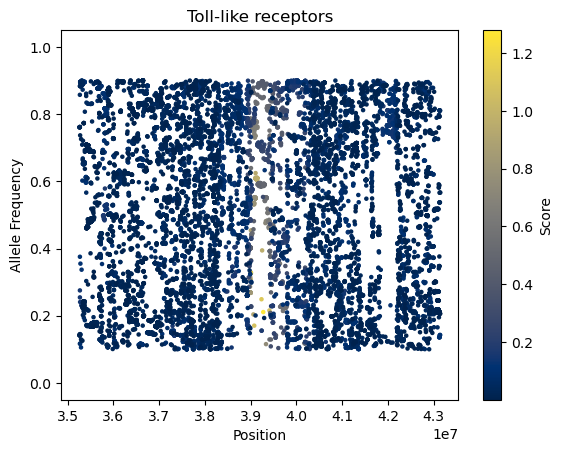

In [38]:
# make scatter plot for scored variants
isweep_scored_variants(tab,idx,cmap=cmap,s=dot_size)
plt.title(locusname)
plt.savefig(locusname+'.isweep.scored.variants.png',dpi=300)

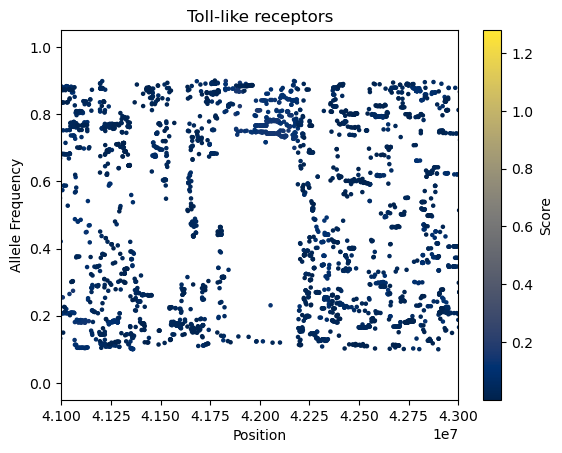

In [41]:
# zoom in on the scatter plot above
# define left, right ends of scatter plot
xleft=41_000_000
xright=43_000_000
# make scatter plot for scored variants
isweep_scored_variants(tab,idx,cmap=cmap,s=dot_size)
plt.title(locusname)
plt.xlim(xleft,xright)
plt.savefig(locusname+'.zoomed.isweep.scored.variants.png',dpi=300)

### Isweep inference with user input

Based on your interpretation of the line and scatter plots above, you decide an allele frequency and a focal position. I recommend strongly that you look for the signal(s) of the type indicated in the isweep paper (hyperlink). When you identify these, use the Beagle utility filter-lines.jar (hyperlink) to subset your ibd file. This new ibd file will be the ibdfilein variable in the following code block. For the allele frequency, I recommend strongly that you choose the allele frequency at the "top of the hill" as indicated in the isweep paper. We provide an example of such user input choices at the end of this notebook.

Use at least 50 bootstraps to provide an interval estimate. The bootstrap code is fast, so you can run way more.

Set the number of sampled individuals in your analysis.

Set the ibd tract length threshold. I recommend strongly that you use 3.0 cM as suggested in the isweep paper.

Optional parameters include setting a genetic model ('a'dditive, 'd'ominant, 'r'ecessive, or 'm' multiplicative), a low level of standing variation (float), and a time in generations that the sweep ended (i.e., s=0). Unless you have prior knowledge from the literature, I recommend strongly that you do not change these optional parameters.

In [ ]:
### mandatory ###

p= # allele frequency
num_boot= # number of (parametric) bootstraps
num_samples= # number of sampled indthe ividuals
ibdfilein='' # ibd tracts about focal position
long_ibd=3.0 # length threshold of ibd tract
num_tracts=0
with gzip.open(ibdfilein, 'rt') as f:
    for line in f:
        row=line.strip().split('\t')
        if float(row[7]) >= long_ibd:
            num_tracts += 1

### optional ###
genetic_model='a'
standing_variation=0 # frequency of standing variation
tau=0 # time since s=0 (not ongoing sweep)

### don't touch !?! ###
ploidy=2
Ne=read_Ne(nefile)

In [ ]:
### estimate

n=ploidy*num_samples
N=n*(n-1)/2-n

# moment estimate
s_est=minimize_scalar(
    chi2_isweep,
    args=(p,
          Ne,
          N,
          (num_tracts,),
          [long_ibd,np.inf],
          genetic_model,
          tau,
          standing_variation
         ),
    bounds=(0,0.5),
    method='bounded'
).x

In [ ]:
### bootstrap

alpha=0.05 # (1-\alpha)% confidence interval
sboots=[]

# for loop
for b in range(num_boot):
    # simulate coalescent + ibd
    simdata=simulate_ibd_isweep(num_samples,
                                s_est,
                                p,
                                Ne,
                                long_ibd=long_ibd,
                                short_ibd=long_ibd,
                                ploidy=ploidy,
                                one_step_model=genetic_model,
                                tau0=tau,
                                sv=standing_variation,
                                random_walk=True
                               )
    # get num ibd tracts
    simibd=simdata[0][0]
    # moment estimate
    sboot=minimize_scalar(
        chi2_isweep,
        args=(p,
              Ne,
              N,
              (simibd,),
              [long_ibd,np.inf],
              genetic_model,
              tau,
              standing_variation
             ),
        bounds=(0,0.5),
        method='bounded'
    ).x
    sboots.append(sboot)

alpha1=alpha/2
alpha2=1-alpha1
# you can change this interval type to others available
sl,sm,su=bootstrap_standard_bc(s_est,sboots,alpha1,alpha2)
print(sl,sm,su)

In [ ]:
# plotting